In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ujipenchars2
import string
import random
import itertools
from drawing import Drawing
from preprocessing import DrawingToBoxScaler, DrawingResampler, VideoCreator
#from dtw import dtw, dtw_distance_matrix
from PIL import Image, ImageDraw, ImageFilter, ImageOps
np.random.seed(0)

In [2]:
def drawing_to_tensor(drawings,*args):   
    """pretvara drawing u numpy.array gdje je svaki slice slika jednog stroka"""
    base_resolution=args[0]  #slika rezolucije resolution*resolution u kojoj se crta
    real_resolution=args[0]  #rezolucija na koju se slika skalira na kraju
    if len(args)==2:
        real_resolution=args[1]
    
    first=True
    for drawing in drawings:
        scaled_strokes=[stroke*base_resolution for stroke in drawing.strokes]
        img = Image.new("RGB", (base_resolution, base_resolution))
        img1 = ImageDraw.Draw(img)
        for stroke in scaled_strokes:
            x=stroke[:,0]
            y=stroke[:,1]
            y=base_resolution-y-1
            img1.line(np.column_stack((x,y)), width = 5) 
            #img.filter(ImageFilter.GaussianBlur(radius = 3))
            
        gray_image = ImageOps.grayscale(img)
        gray_image=gray_image.resize((real_resolution,real_resolution))
        frontal_slice=np.asarray(gray_image)
        
        if first:
            T=frontal_slice[None]
            first=False
        else:
            T=np.concatenate((T,frontal_slice[None]),axis=0)
    return T

In [3]:
def plot_drawing(drawing):
    plt.title(drawing.label)
    for stroke in drawing.strokes:
        plt.plot(stroke[:,0], stroke[:,1], color='black', linewidth=10, solid_capstyle='round')
    plt.axis('scaled')

In [4]:
train, test = ujipenchars2.Parser('data/ujipenchars2').parse(string.digits)

drawing_scaler = DrawingToBoxScaler(0.05,0.95,0.05,0.95)
train = drawing_scaler.transform(train)
test = drawing_scaler.transform(test)

data = train + test
drawing=data[14]

In [5]:
n_frames = 5
video_creator = VideoCreator(n_frames)
video = video_creator.transform_one(drawing)

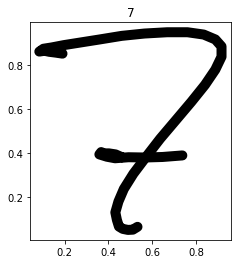

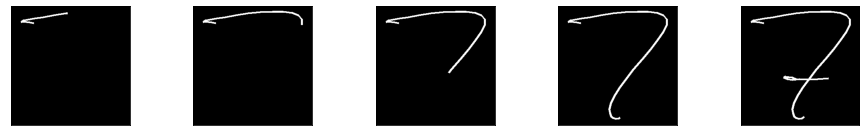

In [6]:
drawing_tensor=drawing_to_tensor(video,300)
plot_drawing(drawing)
fig=plt.figure(figsize=(13, 2))
for i in range(n_frames):
    plt.subplot(1, n_frames, i + 1)
    plt.imshow(drawing_tensor[i], cmap='gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

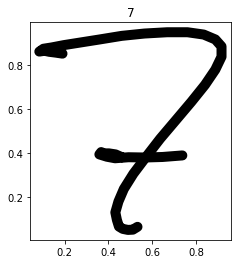

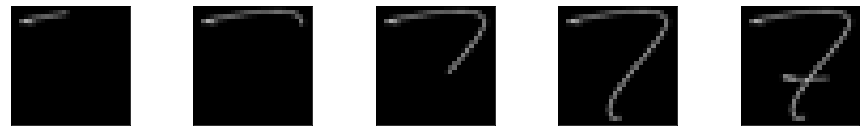

In [7]:
drawing_tensor=drawing_to_tensor(video,300,28)
plot_drawing(drawing)
fig=plt.figure(figsize=(13, 2))
for i in range(n_frames):
    plt.subplot(1, n_frames, i + 1)
    plt.imshow(drawing_tensor[i], cmap='gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()